
Atiya Kailany <br>
April 25, 2021<br>
<br>

# Classifying using clustering and various dimensionality reduction ML algorithms
<br>
Please find my implementation of KMeans in the file myKMeans.py as well as my implementation of PCA in the file myPCA.py

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Question 1:

For question 1 feature selection, I used the sklearn library for PCA. As it gave me the most accurate
features and I will be able to compare it to my self-built PCA.

KMeans algorithm is implemented in a seperate file (please see myKMeans.py). Black X's are centers

Below is my KMeans algorithm for K = 10 as well as the MSE/ Reconstruction Error (please see function in myKMeans.py)

Reconstruction Error / MSE for k = 10:  1.4133271600909634


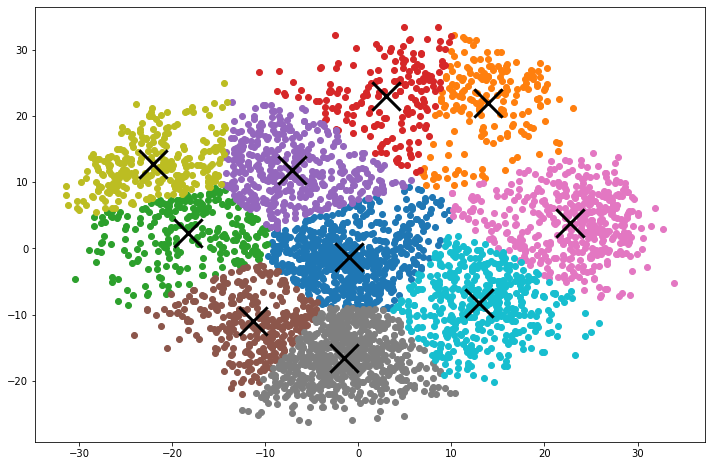

In [2]:
"""Question 1"""
from myKMeans import myKMeans


training_df = pd.read_csv('./optdigits/optdigits.tra',header=None)
features, labels = training_df.loc[:,0:63], training_df.loc[:,64]

from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(features)


k = myKMeans(K=10, iteration=10)
y_pred = k.predict(reduced_data)

mse10 = k.sumSquaredError(reduced_data, 10)
print('Reconstruction Error / MSE for k = 10: ',mse10)

k.plot()


## Question 1 Continued:

Below is my KMeans algorithm for K = 20 as well as the MSE/ Reconstruction Error (please see function in myKMeans.py)

Reconstruction Error / MSE for k = 20:  0.7366786369963216


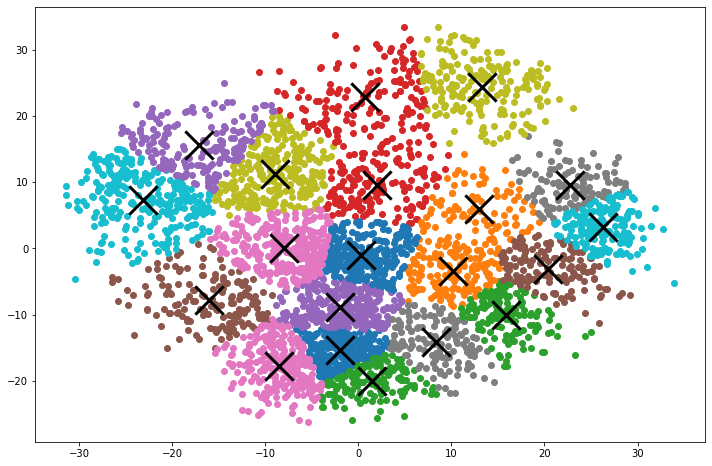

In [3]:
"""Question 1 Continued"""
# k = 20
k = myKMeans(K=20, iteration=10)
y_pred = k.predict(reduced_data)

mse20 = k.sumSquaredError(reduced_data, 20)
print('Reconstruction Error / MSE for k = 20: ',mse20)

k.plot()


## Question 2:

PCA algorithm is implemented in a separate file (please see myPCA.py)

Below is my KMeans algorithm for K = 10 with my self-built PCA algorithm for reducing the dimensions.

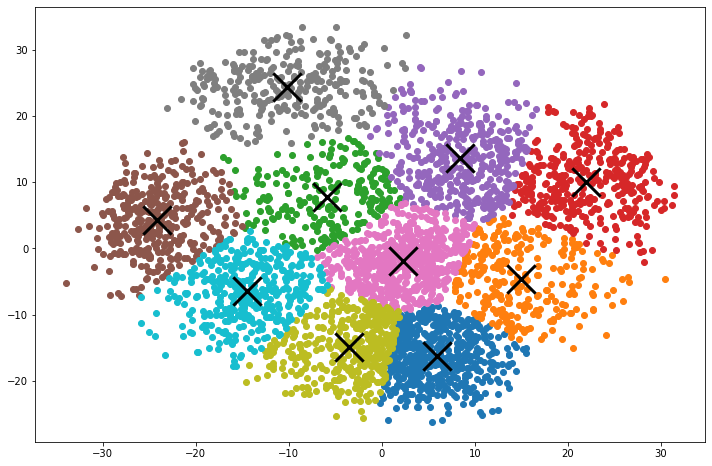

In [4]:
"""Question 2"""
from myPCA import myPCA

pca = myPCA(2)
pca.fit(features)
myPCA_reduced_data = pca.transform(features)

k = myKMeans(K=10, iteration=10)
y_pred = k.predict(myPCA_reduced_data)

k.plot()

PCA from Textbook:<br>
As seen, my implemented PCA is very similar to that of the textbook.
<br>

![Screen Shot 2021-04-25 at 7 16 17 PM](https://user-images.githubusercontent.com/42689178/116016714-c591b600-a5fa-11eb-9c7f-b70d2fa07c8f.jpg)



## Question 3:

Below is myKMeans algorithm for K = 10. Howeverm, for dimensionality reduction, sklearn LDA library is being used
as instructed by the assignment.

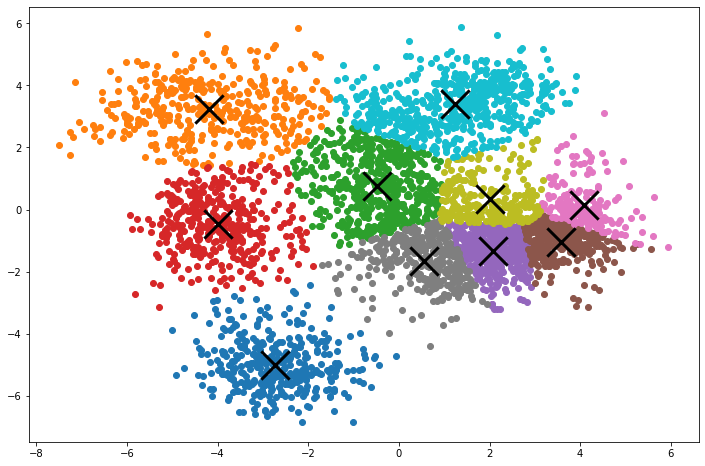

In [5]:
"""Question 3"""
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

reduced_LDA_data = LDA(n_components=2).fit_transform(features, labels)

k = myKMeans(K=10, iteration=10)
y_pred = k.predict(reduced_LDA_data)

k.plot()

LDA from Textbook:<br>
As seen, sklearn LDA is very similar to that of the textbook, if not identical
<br>

![Screen Shot 2021-04-25 at 7 43 46 PM](https://user-images.githubusercontent.com/42689178/116018139-a4cb5f80-a5fe-11eb-9970-5f7d9c6ab3a5.jpg)

## Question 4:


Below is sklearn KNN algorithm over the optdigit.tra for k values 3, 5, 15

All k values are tried then accuracy is calculated and 5 is decided to have the highest accuracy as seen in the graph

Text(0, 0.5, 'Accuracy')

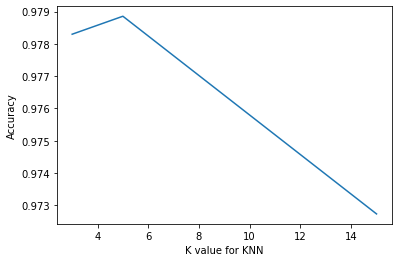

In [6]:
"""Question 4"""
training_df = pd.read_csv('./optdigits/optdigits.tra',header=None)
train_features, train_labels = training_df.loc[:,0:63], training_df.loc[:,64]

training_df = pd.read_csv('./optdigits/optdigits.tes',header=None)
test_features, test_labels = training_df.loc[:,0:63], training_df.loc[:,64]

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_value = [3, 5, 15]
scores = {}
scores_list = []
for k in k_value:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels)
    y_pred = knn.predict(test_features)
    scores[k] = metrics.accuracy_score(test_labels, y_pred)
    scores_list.append(metrics.accuracy_score(test_labels, y_pred))
    
plt.plot(k_value, scores_list)
plt.xlabel('K value for KNN')
plt.ylabel('Accuracy')

## Question 4 Continued:

Finally KNN is being implemented for k=5 since it had the highest accuracy. Then the confusion matrix and each label
error rate is being calculated based on K=5.

In [7]:
"""Question 4 Continued..."""

# Since k=5 had the highest accuracy when run again using k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
y_pred = knn.predict(test_features)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels,y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
print('Confusion matrix : \n',matrix)

from sklearn.metrics import classification_report
matrix = classification_report(test_labels,y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
print('\n \n Classification report : \n',matrix)

Confusion matrix : 
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 181   0   0   0   0   1   0   0   0]
 [  0   3 174   0   0   0   0   0   0   0]
 [  0   1   0 178   0   1   0   1   2   0]
 [  0   1   0   0 179   0   0   0   1   0]
 [  0   0   0   0   1 180   0   0   0   1]
 [  0   0   0   0   0   1 180   0   0   0]
 [  0   0   0   0   0   0   0 173   1   5]
 [  0   8   0   2   0   1   0   0 162   1]
 [  0   0   0   2   1   1   0   0   2 174]]

 
 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.93      0.99      0.96       182
           2       1.00      0.98      0.99       177
           3       0.98      0.97      0.98       183
           4       0.99      0.99      0.99       181
           5       0.98      0.99      0.98       182
           6       0.99      0.99      0.99       181
           7       0.99      0.97      0.98       179
           8       0.96      0.